<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGP-kraken2" data-toc-modified-id="LLMGP-kraken2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGP-kraken2</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#LLMGP-kraken2:-summary" data-toc-modified-id="LLMGP-kraken2:-summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>LLMGP-kraken2: summary</a></span><ul class="toc-item"><li><span><a href="#Reads-mapped" data-toc-modified-id="Reads-mapped-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Reads mapped</a></span><ul class="toc-item"><li><span><a href="#GTDBr86" data-toc-modified-id="GTDBr86-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>GTDBr86</a></span></li><li><span><a href="#GTDBr89" data-toc-modified-id="GTDBr89-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>GTDBr89</a></span></li><li><span><a href="#GTDBr89-AgMs15" data-toc-modified-id="GTDBr89-AgMs15-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>GTDBr89-AgMs15</a></span></li><li><span><a href="#Combined" data-toc-modified-id="Combined-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Combined</a></span><ul class="toc-item"><li><span><a href="#Amount-increased" data-toc-modified-id="Amount-increased-5.1.4.1"><span class="toc-item-num">5.1.4.1&nbsp;&nbsp;</span>Amount increased</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#LLMGP-humann2" data-toc-modified-id="LLMGP-humann2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>LLMGP-humann2</a></span><ul class="toc-item"><li><span><a href="#Run" data-toc-modified-id="Run-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Gene-families" data-toc-modified-id="Gene-families-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Gene families</a></span></li><li><span><a href="#Pathways" data-toc-modified-id="Pathways-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Pathways</a></span></li></ul></li><li><span><a href="#Comparision-to-GTDBr89" data-toc-modified-id="Comparision-to-GTDBr89-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Comparision to GTDBr89</a></span><ul class="toc-item"><li><span><a href="#Genes" data-toc-modified-id="Genes-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Genes</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Run `LLMGP` pipeline on custom GTDBr89-AgMs15 dataset (created with `Struo`)
   * The database is a combination of GTDB-r89 + 95% ANI reps for all MAGs from the multi-study metagenome assembly
     * `Ag` = animal gut
     * `Ms15` = multi-study, n=15
   * Results (% mapped) will be compared to profiling with profiling databased including animal gut MAGs

# Var

In [1]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/'

samples_file = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/samples_cov-gte0.3.tsv'
metadata_file = '/ebio/abt3_projects/Georg_animal_feces/data/mapping/unified_metadata_complete_190529.tsv'

pipeline_dir = '/ebio/abt3_projects/Georg_animal_feces/bin/llmgp/'
threads = 24

# Init

In [118]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(doParallel)
library(LeyLabRMisc)

In [119]:
make_dir(work_dir)
setDTthreads(threads)
df.dims()

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/ 


# LLMGP-kraken2

* just running kraken2

In [5]:
config_file = file.path(work_dir, 'config_custom-db.yaml')
cat_file(config_file)

# DESCRIPTION:
## This is an example of running the pipeline with a custom humann2 db.
## This config is set up to just use the custom nucleotide db, but the protein db could be used also (or instead)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGQC/samples_cov-gte0.3.tsv

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- DB --#
## humann2 
### custom humann2 databases
humann2_nuc_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89-AgMs15/all_genes_annot.fna.gz
humann2_prot_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89-AgMs15/all_genes_annot.dmnd
### required humann2 database files (no need to change this)
genefamily_annotation_

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/Georg_animal_feces/bin/llmgp
screen -L -S llmgp-ga-GTDBr89-AgMs15 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/config_custom-db.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/SGE_log 30
```

# LLMGP-kraken2: summary

In [5]:
# samples data
samples = read.delim(samples_file, sep='\t') 
samples 

Sample,Read1,Read2,Total.Sequences,nonpareil_coverage,nonpareil_diversity
<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>
X144_Cattle,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X144_Cattle/R2_final.fq.gz,10471331,0.3073356,22.03854
X370_African_Bush_Elephant,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X370_African_Bush_Elephant/R2_final.fq.gz,551609,0.3190188,18.99648
⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X256_Zander/R2_final.fq.gz,9198058,0.9757480,14.88468
X84_Common_Chiffchaff,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R1_final.fq.gz,/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGQC/final/X84_Common_Chiffchaff/R2_final.fq.gz,24926183,0.9791558,14.22184


In [6]:
# reading in metadata
metadata = read.delim(metadata_file, sep='\t') %>%
    mutate(diet = gsub(' ', '', diet),
           SampleID = gsub('^F', 'XF', SampleID))
metadata 

SampleID,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,class,order,family,⋯,temp_regulation,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail
<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
XF14_Common_Bream,F14,Brachse,Common.Bream,Abramis_brama,NA,38527,Actinopterygii,Cypriniformes,Cyprinidae,⋯,ectotherm/poikilotherm,2010-08-10,summer,317,Greiner Polypropylene Tube 50ml,feces sampling,omnivore,NA,simple,simple
XF35_Red_Deer,F35,Rothirsch,Red.Deer,Cervus_elaphus,NA,9860,Mammalia,Artiodactyla,Cervidae,⋯,endotherm/homoiotherm,2010-09-29,autumn,229,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X189_fail_Rainbow_Trout,189.fail,Regenbogenforelle,Rainbow.Trout,Oncorhynchus_mykiss,NA,8022,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,2012-03-01,winter,467,Eppendorf tube,feces sampling,carnivore,NA,simple,simple
X232_fail_Brown_Trout,232.fail,Seeforelle,Brown.Trout,Salmo_trutta,NA,8032,Actinopterygii,Salmoniformes,Salmonidae,⋯,ectotherm/poikilotherm,2012-03-15,winter,453,Polyethylene freezer bag,gut section,carnivore,NA,simple,simple


## Reads mapped

### GTDBr86

In [7]:
# listing bracken kreport files from 
x = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/LLMGP_sub5k/'
kreports = list.files(file.path(x, 'kraken'), pattern='*_bracken.kreport', full.names=TRUE)
kreports %>% length %>% print

[1] 291


In [14]:
# reading in tables
read_kreport = function(x){
    df = read.delim(x, sep='\t', header=FALSE)
    df$Sample = gsub('.+/|_bracken.kreport', '', x)
    return(df)
}

registerDoParallel(threads)
to_keep = c('unclassified', 'root', 'cellular organisms', 'Bacteria', 'Archaea')
GTDBr86_unmapped = plyr::llply(as.list(kreports), read_kreport, .parallel=TRUE) %>%
    do.call(rbind, .) %>%
    mutate(V6 = gsub('^ +', '', V6)) %>%
    filter(V6 %in% to_keep)
         
GTDBr86_unmapped 

V1,V2,V3,V4,V5,V6,Sample
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>
70.26,48831526,48831526,U,0,unclassified,unassigned
29.74,20671795,0,R,1,root,unassigned
⋮,⋮,⋮,⋮,⋮,⋮,⋮
63.20,631661,0,D,2,Bacteria,XF90_Domestic_Dog
0.03,315,0,D,2157,Archaea,XF90_Domestic_Dog


In [15]:
# adding metadata
GTDBr86_unmapped = GTDBr86_unmapped %>%
    left_join(metadata %>% 
                dplyr::select(SampleID, class, order, family, genus, scientific_name, 
                              habitat, diet), 
                c('Sample'='SampleID')) %>%
    mutate(perc_unmapped = 100 - V1) %>%
    filter(!is.na(scientific_name)) %>%
    mutate(perc_mapped = 100 - perc_unmapped)

GTDBr86_unmapped$perc_mapped %>% summary %>% print
GTDBr86_unmapped$perc_mapped %>% sd %>% print
GTDBr86_unmapped 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.01    2.43   21.24   31.02   55.42   98.92 
[1] 30.48771


V1,V2,V3,V4,V5,V6,Sample,class,order,family,genus,scientific_name,habitat,diet,perc_unmapped,perc_mapped
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
79.81,1291066,1291066,U,0,unclassified,X1_Eurasian_Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,terrestrial habitat,herbivore,20.19,79.81
20.19,326571,0,R,1,root,X1_Eurasian_Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,terrestrial habitat,herbivore,79.81,20.19
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63.20,631661,0,D,2,Bacteria,XF90_Domestic_Dog,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,terrestrial habitat,carnivore,36.80,63.20
0.03,315,0,D,2157,Archaea,XF90_Domestic_Dog,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,terrestrial habitat,carnivore,99.97,0.03


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/2e2afd7dff1be48672a3983a70ae591a.RDS 


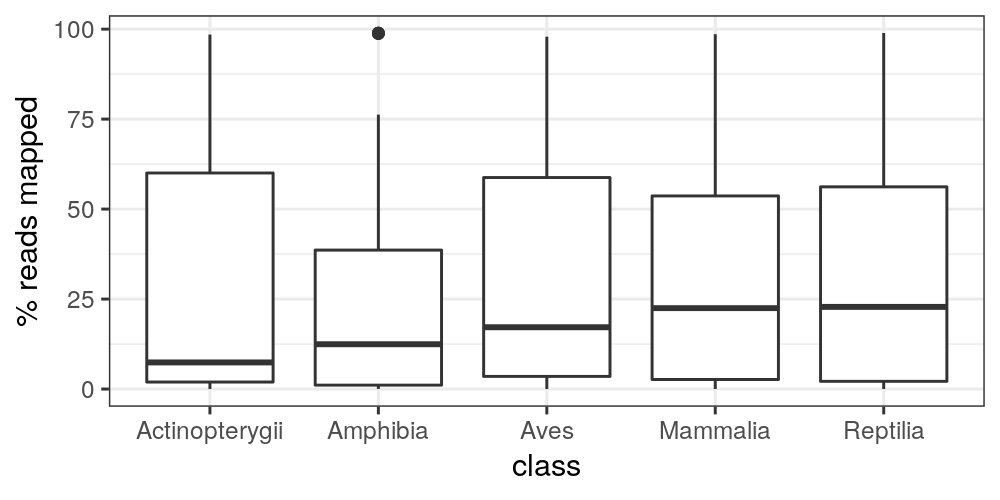

In [17]:
# summarizing
p = GTDBr86_unmapped %>%
    ggplot(aes(class, perc_mapped)) +
    geom_boxplot() +
    scale_color_discrete('Clade') +
    labs(y='% reads mapped') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

### GTDBr89

In [33]:
# unclassified
D = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/'
F = file.path(D, 'kraken', 'all-combined_kraken-unclassified.tsv')
GTDBr89_unmapped = read.delim(F, sep='\t')
GTDBr89_unmapped

sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>
X258_Eurasian_Magpie,88.76,1202066,1202066,U,0,unclassified
X71_Fire_Salamander,78.92,1548978,1548978,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,54.63,5029986,5029986,U,0,unclassified
X84_Common_Chiffchaff,71.99,17948275,17948275,U,0,unclassified


In [34]:
# adding metadata
GTDBr89_unmapped = GTDBr89_unmapped %>%
    left_join(metadata %>% 
                dplyr::select(SampleID, class, order, family, genus, 
                              scientific_name, habitat, diet), 
                c('sample'='SampleID')) %>%
    filter(!is.na(sample), !is.na(class)) %>%
    mutate(perc_mapped = 100 - percent_reads)

GTDBr89_unmapped$perc_mapped %>% summary %>% print
GTDBr89_unmapped$perc_mapped %>% sd %>% print
GTDBr89_unmapped 

Warning message:
“Column `sample`/`SampleID` joining factor and character vector, coercing into character vector”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.50   16.33   35.45   37.21   52.39   94.32 
[1] 23.22494


sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name.x,class,order,family,genus,scientific_name.y,habitat,diet,perc_mapped
<chr>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>
X258_Eurasian_Magpie,88.76,1202066,1202066,U,0,unclassified,Aves,Passeriformes,Corvidae,Pica,Pica_pica,terrestrial habitat,omnivore,11.24
X71_Fire_Salamander,78.92,1548978,1548978,U,0,unclassified,Amphibia,Caudata,Salamandridae,Salamandra,Salamandra_salamandra,terrestrial habitat,carnivore,21.08
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,54.63,5029986,5029986,U,0,unclassified,Actinopterygii,Perciformes,Percidae,Sander,Sander_lucioperca,aquatic habitat,carnivore,45.37
X84_Common_Chiffchaff,71.99,17948275,17948275,U,0,unclassified,Aves,Passeriformes,Sylviidae,Phylloscopus,Phylloscopus_collybita,terrestrial habitat,omnivore,28.01


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/8394778dade65f9e4fa49406a4aaf175.RDS 


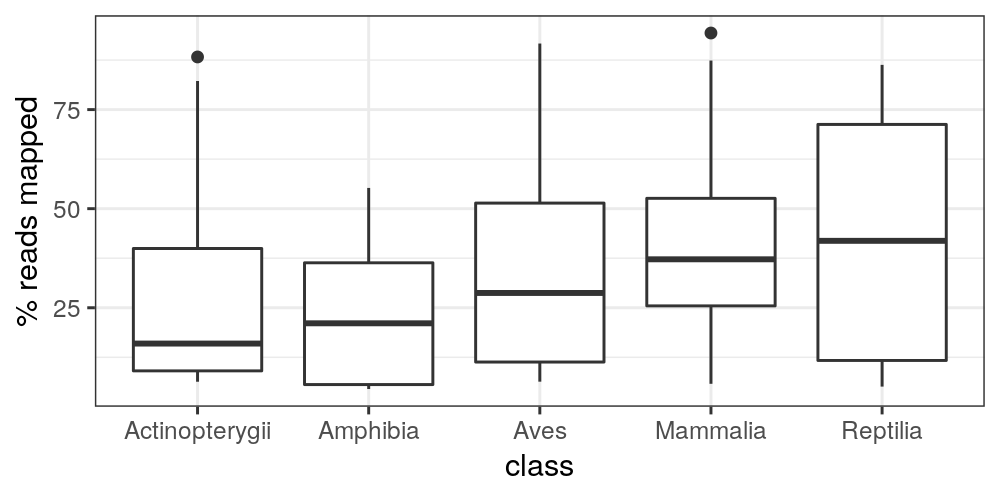

In [36]:
# summarizing
p = GTDBr89_unmapped %>%
    ggplot(aes(class, perc_mapped)) +
    geom_boxplot() +
    labs(y='% reads mapped') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

### GTDBr89-AgMs15

In [37]:
# unclassified
F = file.path(work_dir, 'kraken', 'all-combined_kraken-unclassified.tsv')
GTDBr89.AgMs15_unmapped = read.delim(F, sep='\t')
GTDBr89.AgMs15_unmapped 

sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name
<fct>,<dbl>,<int>,<int>,<fct>,<int>,<fct>
X258_Eurasian_Magpie,88.08,1192852,1192852,U,0,unclassified
X71_Fire_Salamander,78.42,1539297,1539297,U,0,unclassified
⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,26.04,2397672,2397672,U,0,unclassified
X84_Common_Chiffchaff,9.16,2285021,2285021,U,0,unclassified


In [38]:
# adding metadata
GTDBr89.AgMs15_unmapped = GTDBr89.AgMs15_unmapped %>%
    left_join(metadata %>% 
                dplyr::select(SampleID, class, order, family, genus, 
                              scientific_name, habitat, diet), 
                c('sample'='SampleID')) %>%
    filter(!is.na(sample), !is.na(class)) %>%
    mutate(perc_mapped = 100 - percent_reads)

GTDBr89.AgMs15_unmapped$perc_mapped %>% summary %>% print
GTDBr89.AgMs15_unmapped$perc_mapped %>% sd %>% print
GTDBr89.AgMs15_unmapped 

Warning message:
“Column `sample`/`SampleID` joining factor and character vector, coercing into character vector”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.68   19.02   40.68   42.50   63.97   96.07 
[1] 25.50994


sample,percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name.x,class,order,family,genus,scientific_name.y,habitat,diet,perc_mapped
<chr>,<dbl>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>
X258_Eurasian_Magpie,88.08,1192852,1192852,U,0,unclassified,Aves,Passeriformes,Corvidae,Pica,Pica_pica,terrestrial habitat,omnivore,11.92
X71_Fire_Salamander,78.42,1539297,1539297,U,0,unclassified,Amphibia,Caudata,Salamandridae,Salamandra,Salamandra_salamandra,terrestrial habitat,carnivore,21.58
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
X256_Zander,26.04,2397672,2397672,U,0,unclassified,Actinopterygii,Perciformes,Percidae,Sander,Sander_lucioperca,aquatic habitat,carnivore,73.96
X84_Common_Chiffchaff,9.16,2285021,2285021,U,0,unclassified,Aves,Passeriformes,Sylviidae,Phylloscopus,Phylloscopus_collybita,terrestrial habitat,omnivore,90.84


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/e020c3e2921509e70f386d2ea41c7550.RDS 


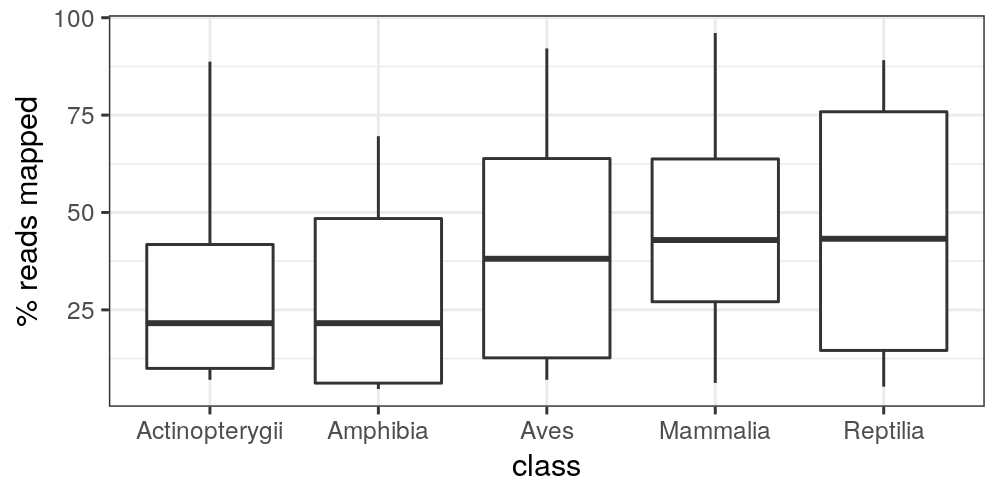

In [41]:
# summarizing
p = GTDBr89.AgMs15_unmapped %>%
    ggplot(aes(class, perc_mapped)) +
    geom_boxplot() +
    labs(y='% reads mapped') +
    theme_bw()

p.dims(5,2.5)
Plot(p)

### Combined

In [57]:
x

percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name.x,sample,class,order,family,genus,scientific_name.y,habitat,diet,perc_unmapped,perc_mapped,database
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>,<chr>
79.81,1291066,1291066,U,0,unclassified,X1_Eurasian_Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,terrestrial habitat,herbivore,20.19,79.81,GTDBr86
90.45,4200489,4200489,U,0,unclassified,X10_House_Mouse,Mammalia,Rodentia,Muridae,Mus,Mus_musculus,anthropogenic habitat,omnivore,9.55,90.45,GTDBr86
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
85.88,2338941,2338941,U,0,unclassified,XF44_Fallow_Deer,Mammalia,Artiodactyla,Cervidae,Dama,Dama_dama,terrestrial habitat,herbivore,14.12,85.88,GTDBr86
36.77,367474,367474,U,0,unclassified,XF90_Domestic_Dog,Mammalia,Carnivora,Canidae,Canis,Canis_lupus,terrestrial habitat,carnivore,63.23,36.77,GTDBr86


[1] "perc_unmapped" "database"

In [77]:
x = GTDBr86_unmapped %>%
    filter(V6 == 'unclassified')
colnames(x)[1:6] = c('percent_reads', 'num_reads_mapped_to_clade', 
                     'num_reads_mapped_to_taxon', 'rank_code', 'taxID',
                     'scientific_name.x')
x = x %>%
    rename("scientific_name.y" = scientific_name,
           "sample" = Sample) %>%
    mutate(perc_mapped = 100 - percent_reads,
           database = 'GTDBr86') %>%
    dplyr::select(-perc_unmapped)

all_unmapped = x %>%
    rbind(GTDBr89_unmapped %>% mutate(database = 'GTDBr89')) %>%
    rbind(GTDBr89.AgMs15_unmapped %>% mutate(database = 'GTDBr89-AgMs15')) %>%
    filter(!is.na(sample), !is.na(class)) 
    
all_unmapped$perc_mapped %>% summary
all_unmapped 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.08   14.21   33.87   35.79   52.28   96.07 

percent_reads,num_reads_mapped_to_clade,num_reads_mapped_to_taxon,rank_code,taxID,scientific_name.x,sample,class,order,family,genus,scientific_name.y,habitat,diet,perc_mapped,database
<dbl>,<int>,<int>,<fct>,<int>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>
79.81,1291066,1291066,U,0,unclassified,X1_Eurasian_Beaver,Mammalia,Rodentia,Castoridae,Castor,Castor_fiber,terrestrial habitat,herbivore,20.19,GTDBr86
90.45,4200489,4200489,U,0,unclassified,X10_House_Mouse,Mammalia,Rodentia,Muridae,Mus,Mus_musculus,anthropogenic habitat,omnivore,9.55,GTDBr86
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
26.04,2397672,2397672,U,0,unclassified,X256_Zander,Actinopterygii,Perciformes,Percidae,Sander,Sander_lucioperca,aquatic habitat,carnivore,73.96,GTDBr89-AgMs15
9.16,2285021,2285021,U,0,unclassified,X84_Common_Chiffchaff,Aves,Passeriformes,Sylviidae,Phylloscopus,Phylloscopus_collybita,terrestrial habitat,omnivore,90.84,GTDBr89-AgMs15


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/bd46eae7cc6bb1292305b2d848266d6d.RDS 


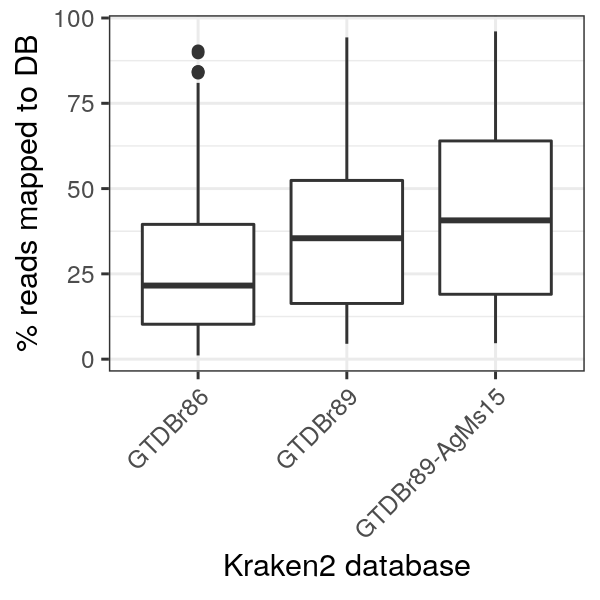

In [81]:
# summarizing
p = all_unmapped %>%
    ggplot(aes(database, perc_mapped)) +
    geom_boxplot() +
    labs(x='Kraken2 database', y='% reads mapped to DB') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(3,3)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/7966e98181ea265a9b740f7d2a5180d9.RDS 


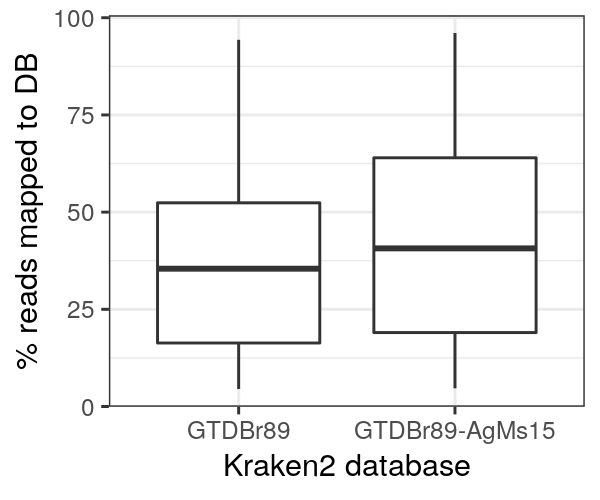

In [82]:
# summarizing
p = all_unmapped %>%
    filter(!is.na(sample),
           database != 'GTDBr86') %>%
    ggplot(aes(database, perc_mapped)) +
    geom_boxplot() +
    labs(x='Kraken2 database', y='% reads mapped to DB') +
    theme_bw()

p.dims(3,2.5)
Plot(p)

In [83]:
# significant diff?
all_unmapped_f = all_unmapped %>%
    filter(!is.na(sample),
           database != 'GTDBr86') 

t.test(all_unmapped_f$percent_reads ~ all_unmapped_f$database,
       alternative = c('greater'))


	Welch Two Sample t-test

data:  all_unmapped_f$percent_reads by all_unmapped_f$database
t = 2.6257, df = 578.93, p-value = 0.004438
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 1.971475      Inf
sample estimates:
       mean in group GTDBr89 mean in group GTDBr89-AgMs15 
                    62.79075                     57.49887 


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/5b6bd9997d66264c0ad255160643c7c2.RDS 


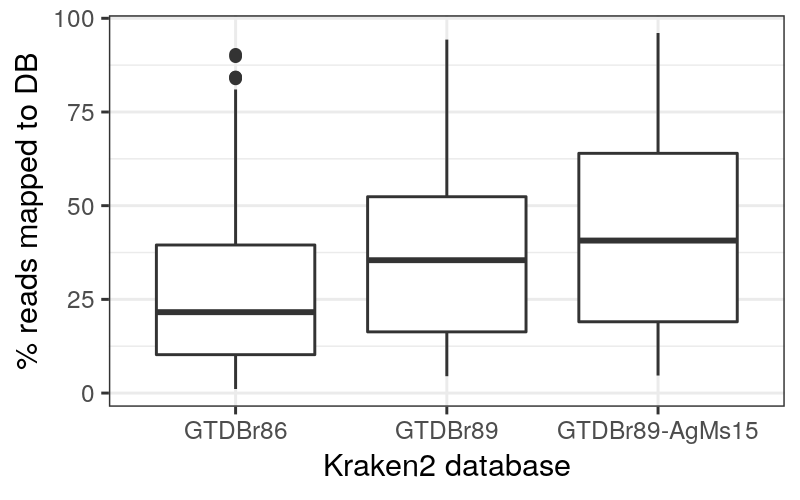

In [87]:
# summarizing
p = all_unmapped %>%
    ggplot(aes(database, perc_mapped)) +
    geom_boxplot() +
    labs(x='Kraken2 database', y='% reads mapped to DB') +
    theme_bw()

p.dims(4,2.5)
Plot(p)

database,class,mean_perc_reads
<chr>,<fct>,<dbl>
GTDBr86,Actinopterygii,77.78037
GTDBr86,Amphibia,85.09500
⋮,⋮,⋮
GTDBr89-AgMs15,Mammalia,54.72687
GTDBr89-AgMs15,Reptilia,53.62714


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/b4a13a063f1cc63131e0f645556ab765.RDS 


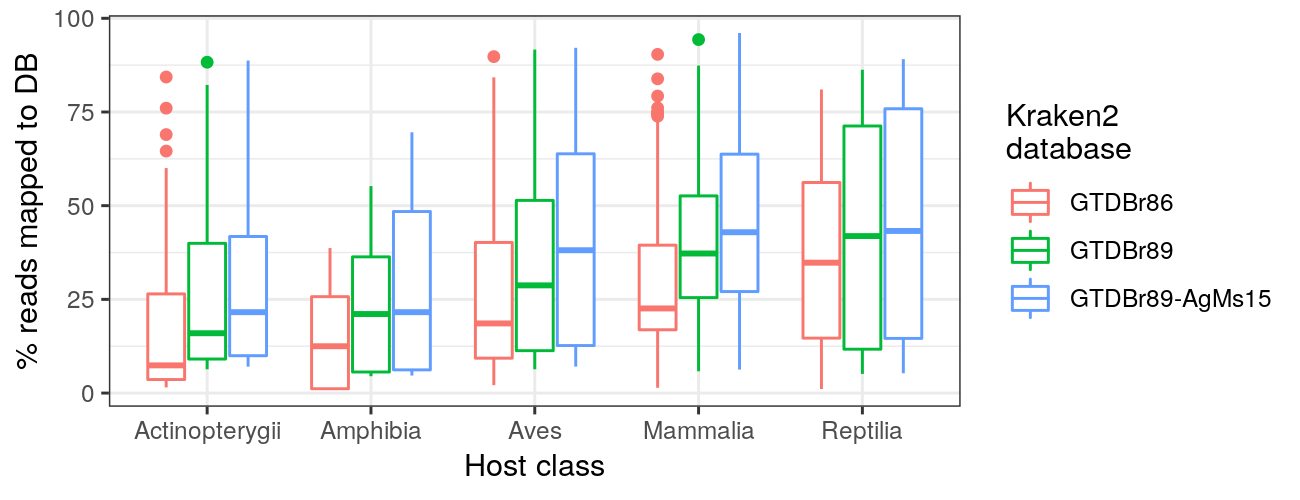

In [92]:
# summarizing
all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class)) %>%
    group_by(database, class) %>%
    summarize(mean_perc_reads = mean(percent_reads)) %>%
    ungroup()

p = all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class)) %>%
    mutate(percent_reads = 100 - percent_reads) %>%
    ggplot(aes(class, percent_reads, color=database)) +
    geom_boxplot() +
    scale_color_discrete('Kraken2\ndatabase') +
    labs(x='Host class', y='% reads mapped to DB') +
    theme_bw()

p.dims(6.5,2.5)
Plot(p)

database,class,mean_perc_reads
<chr>,<fct>,<dbl>
GTDBr89,Actinopterygii,70.45185
GTDBr89,Amphibia,76.84111
⋮,⋮,⋮
GTDBr89-AgMs15,Mammalia,54.72687
GTDBr89-AgMs15,Reptilia,53.62714


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/8ba25677d61609970f8e8794baf35631.RDS 


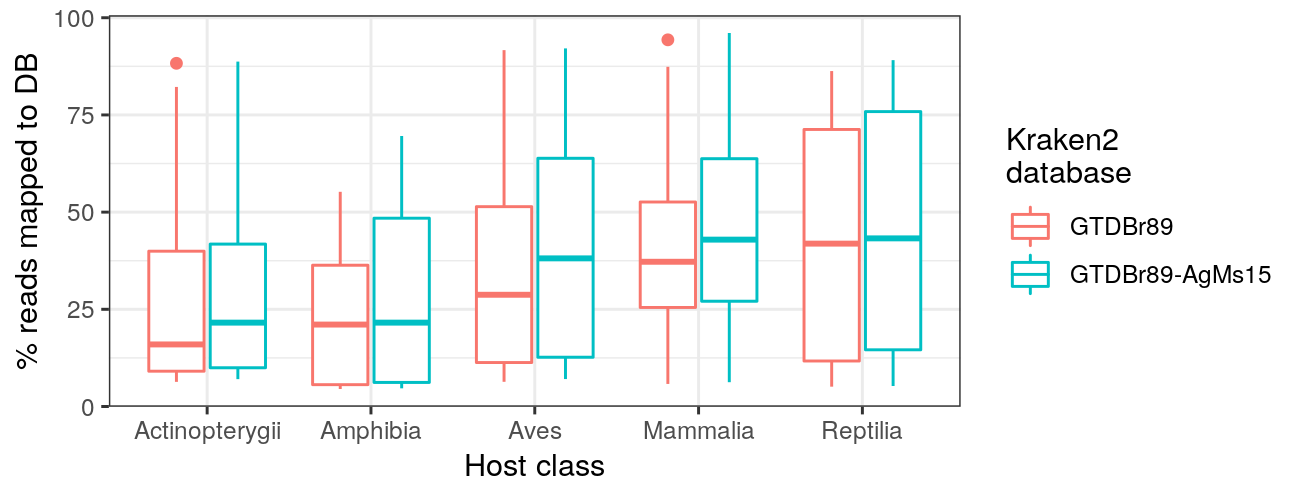

In [90]:
# summarizing
all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class),
           database != 'GTDBr86') %>%
    group_by(database, class) %>%
    summarize(mean_perc_reads = mean(percent_reads)) %>%
    ungroup()

p = all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class),
           database != 'GTDBr86') %>%
    mutate(percent_reads = 100 - percent_reads) %>%
    ggplot(aes(class, percent_reads, color=database)) +
    geom_boxplot() +
    scale_color_discrete('Kraken2\ndatabase') +
    labs(x='Host class', y='% reads mapped to DB') +
    theme_bw()

p.dims(6.5,2.5)
Plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/b4a13a063f1cc63131e0f645556ab765.RDS 


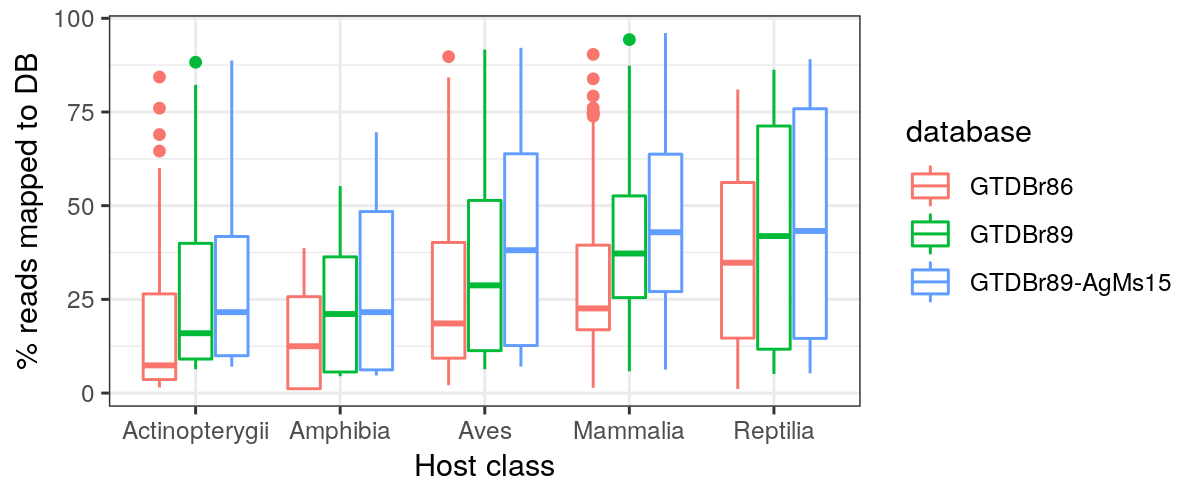

In [96]:
# summarizing
p = all_unmapped %>%
    filter(!is.na(sample)) %>%
    mutate(percent_reads = 100 - percent_reads) %>%
    ggplot(aes(class, percent_reads, color=database)) +
    geom_boxplot() +
    labs(x='Host class', y='% reads mapped to DB') +
    theme_bw()

p.dims(6,2.5)
Plot(p)

In [97]:
all_unmapped %>%
    group_by(database) %>%
    summarize(n = n()) %>%
    ungroup()

database,n
<chr>,<int>
GTDBr86,289
GTDBr89,293
GTDBr89-AgMs15,293


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/5adab7156451319964d29b2a68a20782.RDS 


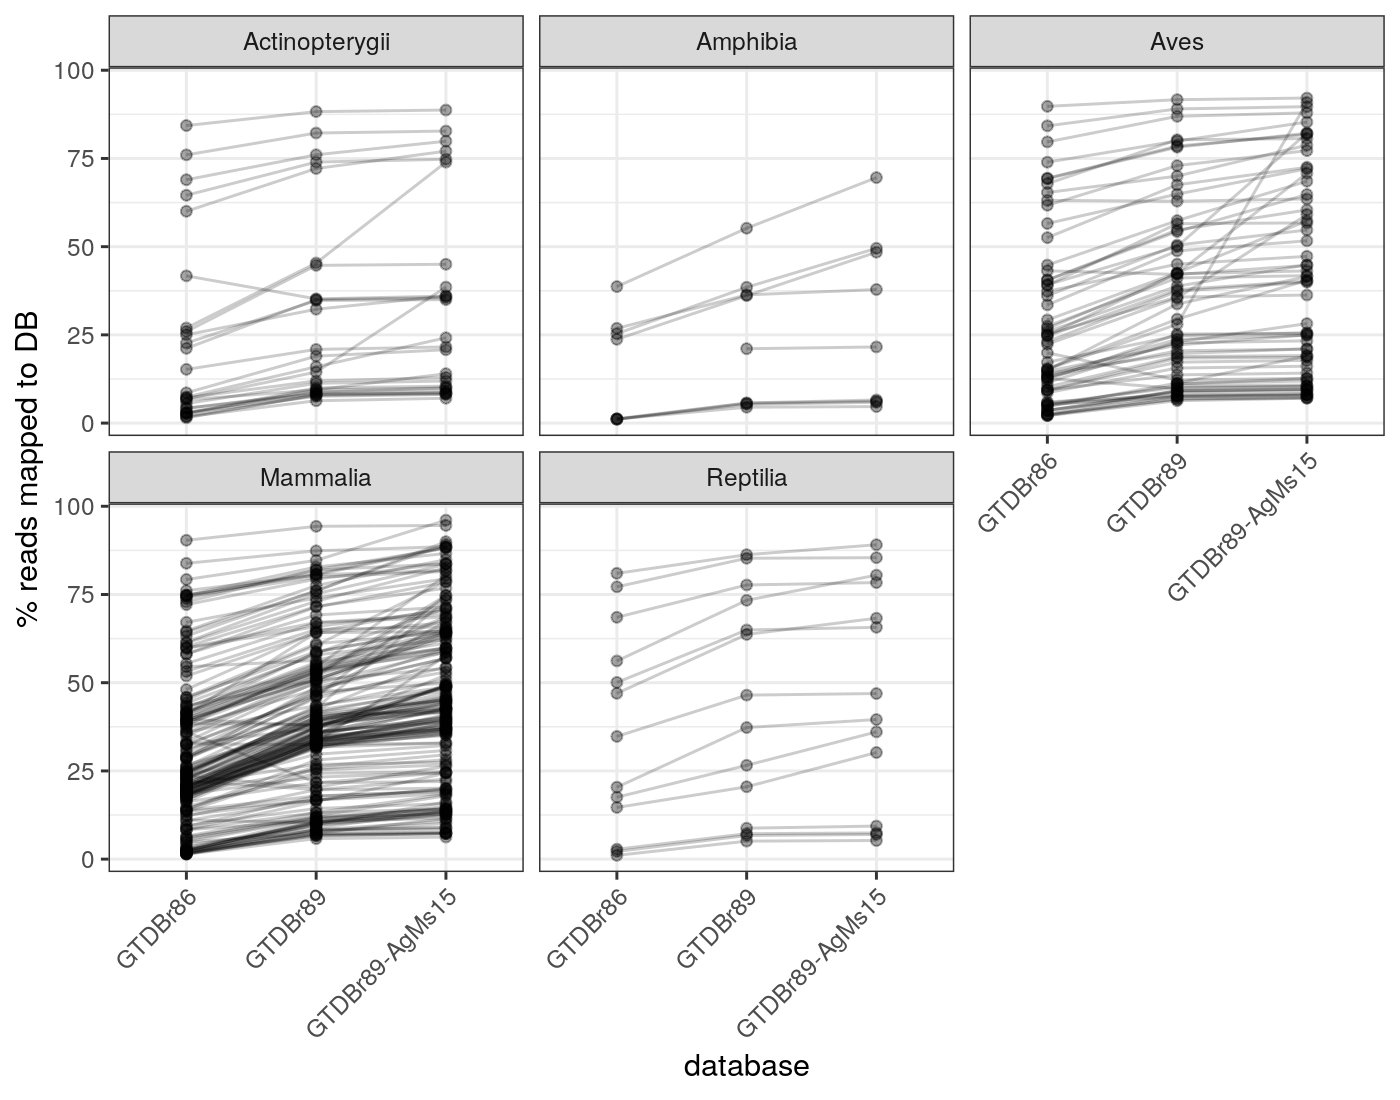

In [99]:
# summarizing
p = all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class)) %>%
    mutate(percent_reads = 100 - percent_reads) %>%
    ggplot(aes(database, percent_reads, group=sample)) +
    geom_line(alpha=0.2) +
    geom_point(alpha=0.35) +
    labs(y='% reads mapped to DB') +
    facet_wrap(~ class) +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )

p.dims(7,5.5)
Plot(p)

#### Amount increased

In [104]:
# summarizing
x = all_unmapped %>%
    filter(!is.na(sample),
           !is.na(class),
           database != 'GTDBr86') %>%
    mutate(percent_reads = 100 - percent_reads) %>%
    dplyr::select(sample, database, percent_reads) %>%
    spread(database, percent_reads) %>%
    mutate(delta_mapped = `GTDBr89-AgMs15` - GTDBr89) %>%
    inner_join(metadata, c('sample'='SampleID')) %>%
    filter(!is.na(scientific_name))

x$delta_mapped %>% summary %>% print
x$delta_mapped %>% sd %>% print

x 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.170   0.700   3.255   5.305   7.133  62.830 
[1] 6.736019


sample,GTDBr89,GTDBr89-AgMs15,delta_mapped,host_subject_id,host_german_name,host_common_name,scientific_name,scientific_name_subspecies,host_taxid,⋯,temp_regulation,collection_date,season,samp_store_days,samp_collect_device,sampling_method,diet,feeding_style,digestive_system,digestive_system_detail
<chr>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>
X1_Eurasian_Beaver,37.23,49.18,11.95,1,Biber,Eurasian.Beaver,Castor_fiber,NA,10185,⋯,endotherm/homoiotherm,2011-05-05,spring,141,Screw cap vial,feces sampling,herbivore,caecotroph,hindgut,caecum
X10_House_Mouse,14.35,15.76,1.41,10,Hausmaus,House.Mouse,Mus_musculus,NA,10090,⋯,endotherm/homoiotherm,2011-08-01,summer,56,Screw cap vial,gut section,omnivore,NA,simple hindgut,caecum
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
XF44_Fallow_Deer,28.10,30.80,2.70,F44,Damhirsch,Fallow.Deer,Dama_dama,NA,30532,⋯,endotherm/homoiotherm,2010-10-04,autumn,230,Greiner Polystyrene 30ml Faeces Container,feces sampling,herbivore,intermediate type,foregut,foregut
XF90_Domestic_Dog,76.13,89.19,13.06,F90,Hund,Domestic.Dog,Canis_lupus,Canis lupus familiaris,9615,⋯,endotherm/homoiotherm,2010-11-07,autumn,210,Greiner Polystyrene 30ml Faeces Container,feces sampling,carnivore,NA,simple,simple


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/fd8803e36589805f5c7304e50c981172.RDS 


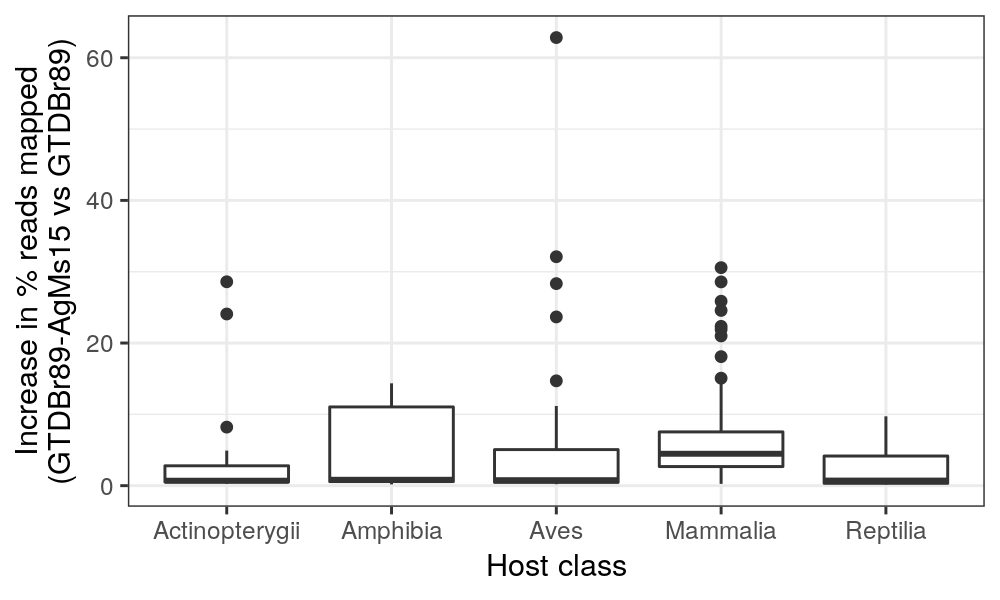

In [102]:
# summarizing
p = x %>%
    ggplot(aes(class, delta_mapped)) +
    geom_boxplot() +
    labs(x='Host class', 
         y='Increase in % reads mapped\n(GTDBr89-AgMs15 vs GTDBr89)') +
    theme_bw()

p.dims(5,3)
Plot(p)

In [103]:
# creating itol file
map_increase_s = x %>%
    filter(!is.na(scientific_name)) %>%
    group_by(scientific_name) %>%
    summarize(mean_delta_mapped = mean(delta_mapped)) %>%
    ungroup() %>%
    as.data.frame
    
rownames(map_increase_s) = map_increase_s$scientific_name
map_increase_s$scientific_name = NULL

F = file.path(work_dir, 'LLMGP-kraken2_GTDBr89-AgMs15_percMapInc_itol-bar.txt')
itol_multibar(map_increase_s, 'Perc_Inc_Mapped', F)

File written: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15//LLMGP-kraken2_GTDBr89-AgMs15_percMapInc_itol-bar.txt 


# LLMGP-humann2

In [62]:
config_file = file.path(work_dir, 'config_custom-db_humann2.yaml')
cat_file(config_file)

# DESCRIPTION:
## This is an example of running the pipeline with a custom humann2 db.
## This config is set up to just use the custom nucleotide db, but the protein db could be used also (or instead)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGQC/samples_cov-gte0.3.tsv

# output location
output_dir: /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/

# read file path
# use "None" if full file path is included in the samples_file
read_file_path: None

#-- DB --#
## humann2 
### custom humann2 databases
humann2_nuc_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89-AgMs15/all_genes_annot.fna.gz
humann2_prot_db: /ebio/abt3_projects/databases_no-backup/GTDB/release89/LLMGP-DB/humann2/GTDBr89-AgMs15/all_genes_annot.dmnd
### required humann2 database files (no need to change this)
genefamily_annotation_

## Run

```
(snakemake_dev) @ rick:/ebio/abt3_projects/methanogen_host_evo/bin/llmgp
screen -L -S llmgp-ga-GTDBr89-AgMs15 ./snakemake_sge.sh /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/config_custom-db_humann2.yaml cluster.json /ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89-AgMs15/SGE_log 34
```

# Summary

## Gene families

In [108]:
# genes
genes_file = file.path(work_dir, 'humann2', 'normalized', 'unstratified', 
                      'regroup', 'annot', 'genefamilies_uniref50_default.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=genes_file)
genes = fread(cmd=cmd, sep='\t', nrows=10) %>%
    as_tibble() %>%
    rename("Gene_family" = `# Gene Family`) %>%
    gather(Sample, Abundance, -Gene_family, -annotation) %>%
    mutate(Sample = gsub('_Abundance-RPKs', '', Sample),
           Abundance = Abundance * 100)

genes 

Gene_family,annotation,Sample,Abundance
<chr>,<chr>,<chr>,<dbl>
UNMAPPED,None,X101_Horse,89.5149
UniRef50_A0A008K4C1,None,X101_Horse,0.0000
⋮,⋮,⋮,⋮
UniRef50_A0A009BJ73: UDP-glucose 4-epimerase,UDP-glucose 4-epimerase,unassigned,0
UniRef50_A0A009DVE3,None,unassigned,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.047   3.905  13.789  20.946  33.404  75.240 
[1] 20.21948


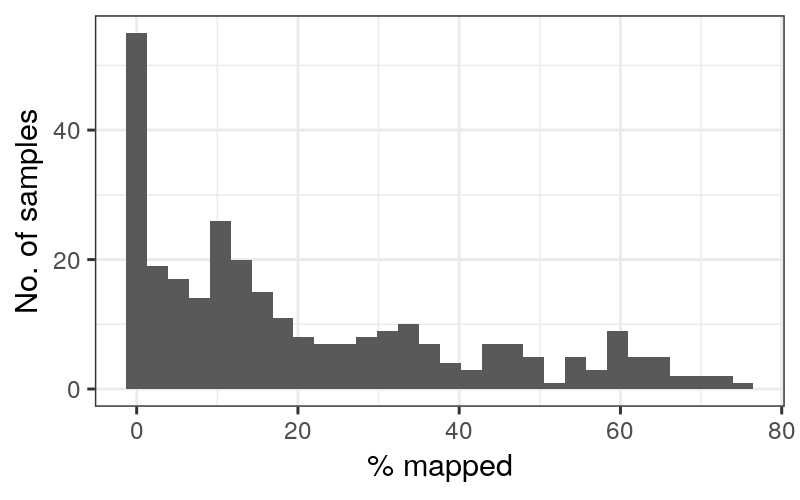

In [115]:
# unmapped
x = genes %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    mutate(perc_mapped = 100 - Abundance) 

x$perc_mapped %>% summary %>% print
x$perc_mapped %>% sd %>% print

p = genes %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    mutate(perc_mapped = 100 - Abundance) %>%
    ggplot(aes(perc_mapped)) +
    geom_histogram(bins=30) +
    labs(x='% mapped', y='No. of samples') +
    theme_bw()

p.dims(4, 2.5)
plot(p)

## Pathways

In [133]:
F = file.path(work_dir, 'humann2', 'normalized', 'unstratified', 'pathabundance.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=F)
ptwy = fread(cmd=cmd, sep='\t', check.names=TRUE) %>%
    dt_rename('Pathway' = X..Pathway) %>%
    dt_pivot_longer(cols=c(-Pathway), names_to='Sample', values_to='Abundance') %>%
    mutate(Sample = gsub('_Abundance', '', Sample),
           Abundance = Abundance * 100)

ptwy 

Pathway,Sample,Abundance
<chr>,<chr>,<dbl>
UNMAPPED,X101_Horse,89.51490
UNINTEGRATED,X101_Horse,8.76274
⋮,⋮,⋮
VALDEG-PWY: L-valine degradation I,unassigned,0.00243052
VALSYN-PWY: L-valine biosynthesis,unassigned,0.01986370


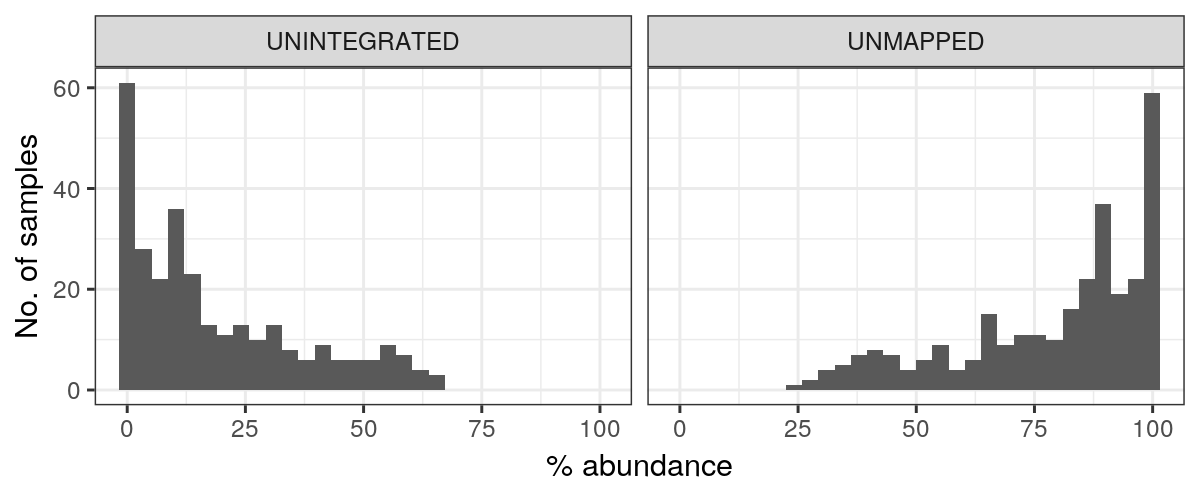

In [134]:
# percent unmapped or unintegrated
p = ptwy %>%
    dt_filter(Pathway %in% c('UNMAPPED', 'UNINTEGRATED')) %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=30) +
    facet_grid(. ~ Pathway) +
    labs(y='No. of samples', x='% abundance') +
    theme_bw()

p.dims(6, 2.5)
plot(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  91.23   96.53   98.23   97.75   99.59  100.00 

[1] 2.059168

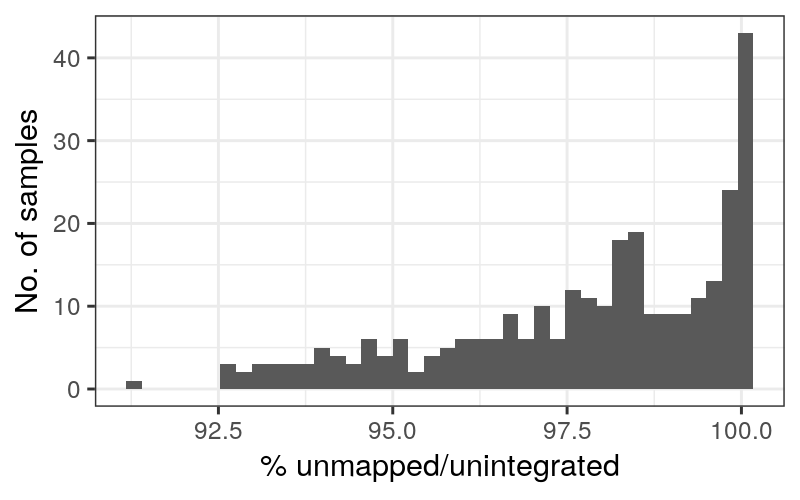

In [138]:
# percent unmapped or unintegrated
ptwy_s = ptwy %>%
    dt_filter(Pathway %in% c('UNMAPPED', 'UNINTEGRATED')) %>%
    dt_summarize(Abundance = sum(Abundance), by=list(Sample)) 

ptwy_s %>% dt_pull(Abundance) %>% summary
ptwy_s %>% dt_pull(Abundance) %>% sd

p = ptwy_s %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=40) +
    theme_bw() +
    labs(x='% unmapped/unintegrated', y='No. of samples')

p.dims(4, 2.5)
plot(p)

# Comparision to GTDBr89

## Genes

In [139]:
work_dir_GTDBr89 = '/ebio/abt3_projects/Georg_animal_feces/data/metagenome/HiSeqRuns126-133-0138/LLMGP_GTDBr89/'

In [155]:
# genes
genes_file_GTDBr89 = file.path(work_dir_GTDBr89, 'humann2', 'normalized', 'unstratified', 
                      'regroup', 'annot', 'genefamilies_uniref50_default.tsv.gz')
cmd = glue::glue('gunzip -c {F}', F=genes_file_GTDBr89)
genes_GTDBr89 = fread(cmd=cmd, sep='\t', nrows=10, check.names=TRUE) %>%
    dt_rename(Gene_family = X..Gene.Family) %>%
    dt_pivot_longer(cols=c(-Gene_family, -annotation), names_to='Sample', values_to='Abundance') %>%
    mutate(Sample = gsub('_Abundance\\.RPKs', '', Sample),
           Abundance = Abundance * 100)

genes_GTDBr89 

Gene_family,annotation,Sample,Abundance
<chr>,<chr>,<chr>,<dbl>
UNMAPPED,None,X101_Horse,91.9965
UniRef50_A0A008K4C1,None,X101_Horse,0.0000
⋮,⋮,⋮,⋮
UniRef50_A0A009BJ73: UDP-glucose 4-epimerase,UDP-glucose 4-epimerase,unassigned,0
UniRef50_A0A009DVE3,None,unassigned,0


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  25.00   74.73   89.98   82.73   96.66   99.96 
[1] 18.44283


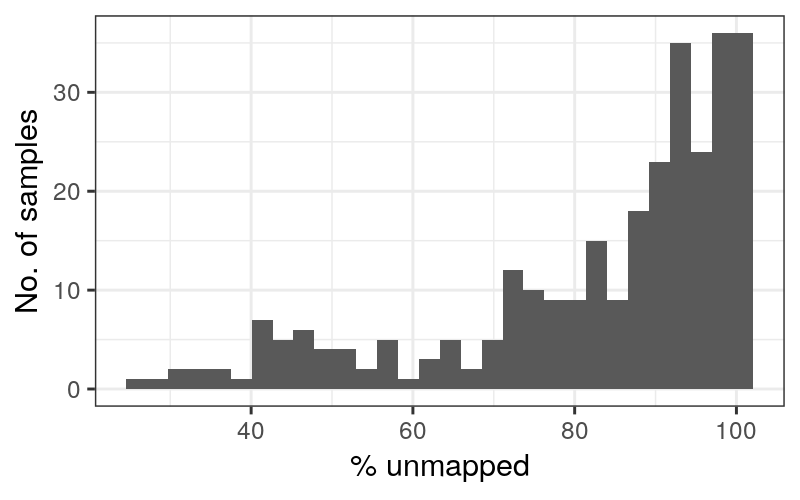

In [156]:
# unmapped
x = genes_GTDBr89 %>%
    dt_filter(Gene_family == c('UNMAPPED')) 

x %>% dt_pull(Abundance) %>% summary %>% print
x %>% dt_pull(Abundance) %>% sd %>% print

p = x %>%
    ggplot(aes(Abundance)) +
    geom_histogram(bins=30) +
    labs(x='% unmapped', y='No. of samples') +
    theme_bw()

p.dims(4, 2.5)
plot(p)

In [157]:
genes_all = rbind(genes_GTDBr89 %>% mutate(database = 'GTDBr89'),
                  genes %>% mutate(database = 'GTDBr89_AgMs15')) 
genes_all

Gene_family,annotation,Sample,Abundance,database
<chr>,<chr>,<chr>,<dbl>,<chr>
UNMAPPED,None,X101_Horse,91.9965,GTDBr89
UniRef50_A0A008K4C1,None,X101_Horse,0.0000,GTDBr89
⋮,⋮,⋮,⋮,⋮
UniRef50_A0A009BJ73: UDP-glucose 4-epimerase,UDP-glucose 4-epimerase,unassigned,0,GTDBr89_AgMs15
UniRef50_A0A009DVE3,None,unassigned,0,GTDBr89_AgMs15


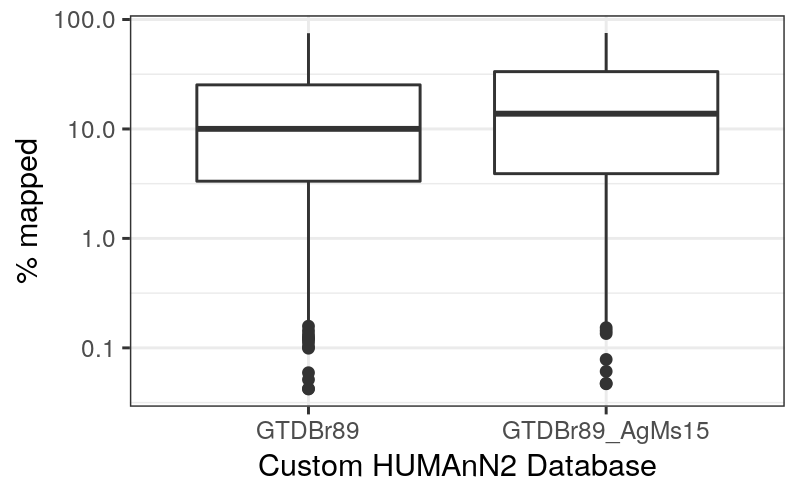

In [158]:
# combining
genes_all = rbind(genes_GTDBr89 %>% mutate(database = 'GTDBr89'),
                  genes %>% mutate(database = 'GTDBr89_AgMs15')) 
   
p = genes_all %>%
    dt_mutate(Abundance = 100 -Abundance) %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    ggplot(aes(database, Abundance)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(x='Custom HUMAnN2 Database', y='% mapped') +
    theme_bw()

p.dims(4, 2.5)
plot(p)

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/3c60d0d3038300cdb4a5fad3d594f786.RDS 


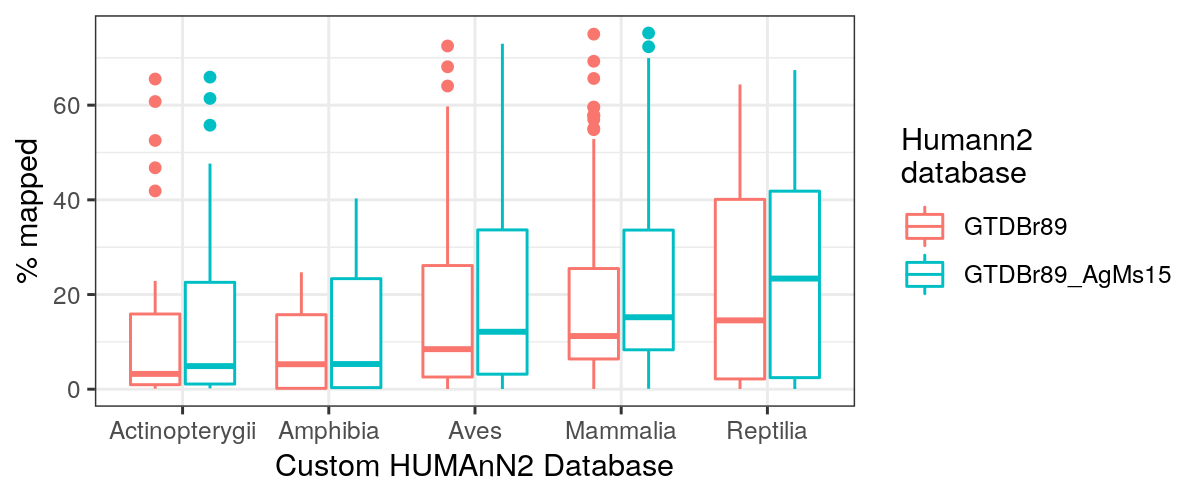

In [160]:
# plotting by class
genes_all_j = rbind(genes_GTDBr89 %>% as_tibble %>% mutate(database = 'GTDBr89'),
                    genes %>% as_tibble %>% mutate(database = 'GTDBr89_AgMs15')) %>%
       inner_join(metadata %>% dplyr::select(SampleID, class, diet),
                  by=c('Sample'='SampleID'))

p = genes_all_j %>%
    mutate(Abundance = 100 - Abundance) %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    ggplot(aes(class, Abundance, color=database)) +
    geom_boxplot() +
    scale_color_discrete('Humann2\ndatabase') +
    labs(x='Custom HUMAnN2 Database', y='% mapped') +
    theme_bw()

p.dims(6, 2.5)
Plot(p)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0046  0.1651  1.7958  3.6746  4.9286 44.7498 

[1] 5.456985

File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/c4cc7f8085d82551df9fc8003ca5c765.RDS 


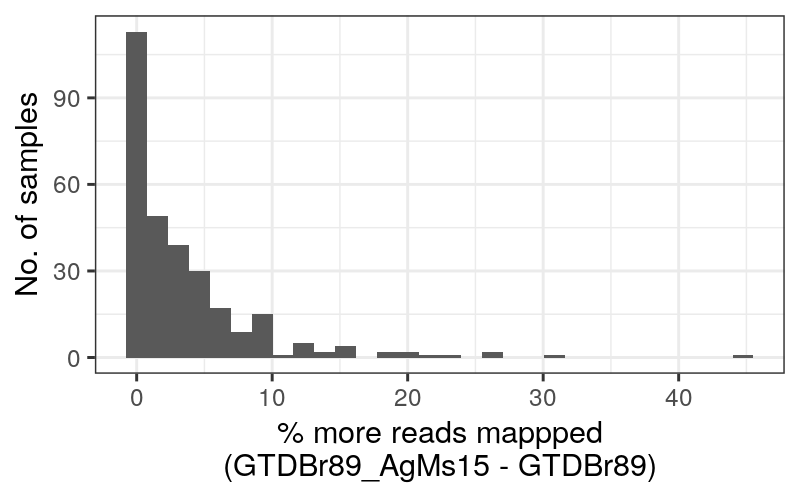

In [162]:
# % more reads mapped
genes_all_s = genes_all %>%
    filter(Gene_family == c('UNMAPPED')) %>%
    mutate(Abundance = 100 - Abundance) %>%
    spread(database, Abundance) %>%
    mutate(perc_more_mapped = GTDBr89_AgMs15 - GTDBr89) 

genes_all_s$perc_more_mapped %>% summary
genes_all_s$perc_more_mapped %>% sd

p = genes_all_s %>%
    ggplot(aes(perc_more_mapped)) +
    geom_histogram(bins=30) +
    labs(x='% more reads mappped\n(GTDBr89_AgMs15 - GTDBr89)', 
         y='No. of samples') +
    theme_bw()

p.dims(4, 2.5)
Plot(p)

In [164]:
# samples with high % increase
df.dims(30)
genes_all_s %>%
    filter(perc_more_mapped > 10) %>%
    arrange(-perc_more_mapped) %>%
    dplyr::select(-Gene_family, -annotation)
df.dims()

Sample,GTDBr89,GTDBr89_AgMs15,perc_more_mapped
<chr>,<dbl>,<dbl>,<dbl>
X84_Common_Chiffchaff,5.6116,50.3614,44.7498
X124_Golden_Jackal,24.1325,54.4242,30.2917
X109_Red_Fox,28.0954,54.8293,26.7339
X256_Zander,8.3352,34.2790,25.9438
X90_Water_Rail,8.7247,32.1653,23.4406
X383_Arctic_Wolf,22.7301,44.0543,21.3242
X263_White_Stork,29.8660,50.1336,20.2676
X362_Gray_Four_eyed_Opossum,16.7542,36.1709,19.4167
X363_Desmarests_Spiny_Pocket_Mouse,18.4099,37.0155,18.6056


File written: /ebio/abt3_projects/Georg_animal_feces/notebooks/metagenome/HiSeqRuns126-133-0138/wOutVertebrata/.figures/2680d9d20026097bd5c65e89f9f93c69.RDS 


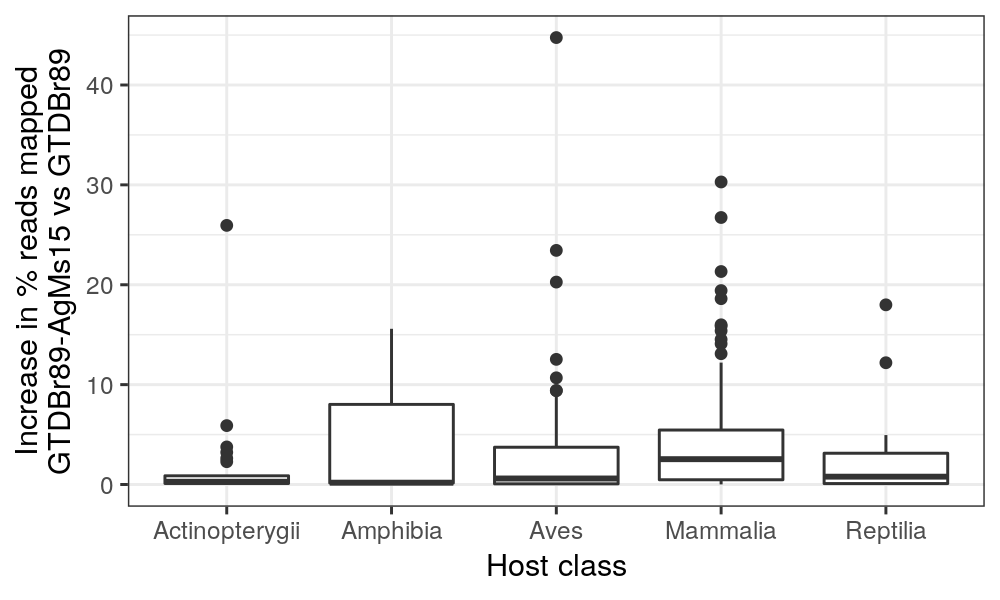

In [166]:
p = genes_all_s %>%
    inner_join(metadata %>% dplyr::select(SampleID, class, diet),
               by=c('Sample'='SampleID')) %>%
    ggplot(aes(class, perc_more_mapped)) +
    geom_boxplot() +
    labs(x='Host class', y='Increase in % reads mapped\nGTDBr89-AgMs15 vs GTDBr89') +
    theme_bw()

p.dims(5,3)
Plot(p)

# sessionInfo

In [167]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.3 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/Georg_animal_feces/envs/tidyverse/lib/libopenblasp-r0.3.7.so

Random number generation:
 RNG:     Mersenne-Twister 
 Normal:  Inversion 
 Sample:  Rounding 
 
locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] tidytable_0.3.2   LeyLabRMisc_0.1.1 doParallel_1.0.15 iterators_1.0.12 
[5] foreach_1.4.7     data.table_1.12.8 ggplot2_3.2.1     tidyr_1.0.0      
[9] dplyr_0.8.3    

In [114]:
pipelineInfo(pipeline_dir)

LLMGP
=====

Ley Lab Metagenome Profiler (LLMGP)

* Version: 0.8.0
* Authors:
  * Nick Youngblut <nyoungb2@gmail.com>
* Maintainers:
  * Nick Youngblut <nyoungb2@gmail.com>

--- conda envs ---
==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/bowtie2.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::samtools
- bioconda::bedtools
- bioconda::bowtie2

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/compress.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- pigz
- bioconda::dsrc

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/fastqc.yaml <==
channels:
- conda-forge
- bioconda
dependencies:
- bioconda::fastqc

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/hadley.yaml <==
channels:
- conda-forge
dependencies:
- conda-forge::r-ape
- conda-forge::r-dplyr
- conda-forge::r-tidyr
- conda-forge::r-ggplot2

==> /ebio/abt3_projects/Georg_animal_feces/bin/llmgp//bin/envs/humann2.yaml <==
channels:
- con